# First Visualization of time series

The idea of this section is to present a basic 
starting point for time-series visualization
Two libraries are presented: pandas and plotly.
Both come with extensive documentation and possibilities

pandas: https://pandas.pydata.org/docs/index.html

plotly: https://plotly.com/python/


This script should give you a very compact starting point for further exploration.
A minimal understanding of python is mandatory.

In [37]:
import pandas as pd
import plotly.express as px
#https://plotly.com/
import os

In [39]:
!pwd

/Users/kienlef/Documents/Vorlesung/2022_SDG_Analytics/data/OWD_clean_indicators


In [41]:
#
path='../data/OWD_clean_indicators/'
try:
    os.chdir(path) # change path
except:
    print('Current path is: '+os.getcwd())
    pass
    
files = os.listdir() ## which files are there

Current path is: /Users/kienlef/Documents/Vorlesung/2022_SDG_Analytics/data/OWD_clean_indicators


In [5]:
files = os.listdir() ## which files are there
files

['11.6.2 PM25-air-pollution.csv',
 '6.4.1 water-productivity.csv',
 '5.5.1 seats-held-by-women-in-national-parliaments.csv',
 '.DS_Store',
 '9.5.2 researchers-in-rd-per-million-people.csv',
 '3.8.1 healthcare-access-and-quality-index.csv',
 'Overview_DEU_correlation.html',
 '7.3.1 energy-intensity-of-economies.csv',
 '9.4.1 cco2-intensity.csv',
 '16.1.1 intentional-homicides-per-100000-people.csv',
 '8.1.1. gdp-per-capita-worldbank.csv',
 '12.5.1 municipal-waste-recycled.csv',
 '12.2.1 material-footprint-per-capita.csv',
 '7.2.1 renewables-share-final-energy.csv',
 '9.2.2. industry-share-of-total-emplyoment.csv',
 '15.1..1 forest-area-as-share-of-land-area.csv',
 '12.2.2 domestic-material-consumption-per-capita.csv',
 '4.3.1 gross-enrollment-ratio-in-tertiary-education.csv',
 '13.2.1 co-emissions-per-capita.csv',
 '2.3.1 agriculture-value-added-per-worker-wdi.csv',
 '1.a.2 health-expenditure-government-expenditure.csv']

In [49]:
df_data=pd.read_csv('8.1.1. gdp-per-capita-worldbank.csv',sep=',')

In [53]:
df_data

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117
...,...,...,...,...
7104,Zimbabwe,ZWE,2016,3173.610829
7105,Zimbabwe,ZWE,2017,3274.611198
7106,Zimbabwe,ZWE,2018,3341.665418
7107,Zimbabwe,ZWE,2019,3027.656038


In [57]:
#accessing column names
df_data.columns

Index(['Entity', 'Code', 'Year',
       'GDP per capita, PPP (constant 2017 international $)'],
      dtype='object')

# Slice out one country

In [65]:
my_data=df_data[df_data['Code']=='USA']
my_data=my_data.set_index('Year')

<AxesSubplot:xlabel='Year'>

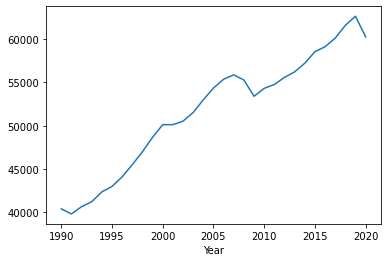

In [67]:
my_data['GDP per capita, PPP (constant 2017 international $)'].plot()

# visualize multiple countries

In [68]:
## get a list of countries
c_list=['DEU','GBR','USA','IND','ISR','ITA','BRA','RUS','CHN','EGY']
my_countries=df_data[df_data['Code'].isin(c_list)]
my_countries.head(5)

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
817,Brazil,BRA,1990,10521.121015
818,Brazil,BRA,1991,10493.928311
819,Brazil,BRA,1992,10268.114098
820,Brazil,BRA,1993,10569.695103
821,Brazil,BRA,1994,10953.120258


In [69]:
fig = px.line(my_countries, 
              x='Year', 
              y='GDP per capita, PPP (constant 2017 international $)', 
              color='Code', )#symbol="country")
fig.show()

In [70]:
fig.write_html('my_first_time_series.html')